# 常用的绘图方法

常用的绘图库 matplotlib/seaborn/pyecharts

本文主要介绍一些常用的可视化图表及其示例, 作为入门.

图表画法大多类似, 要通过这些常用的图表学习其用法, 思想.

In [2]:
# 导入基础库
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# seaborn 是 matplotlib 的扩展, api更高级别的封装. 使画图更为简单.
import seaborn as sns
sns.set_style('whitegrid')
# 该命令使你不必调用 plt.show() 就可以显示图表
%matplotlib inline

## 绘制画布
子图的使用: `plt.subplots`

dataframe 画图函数格式

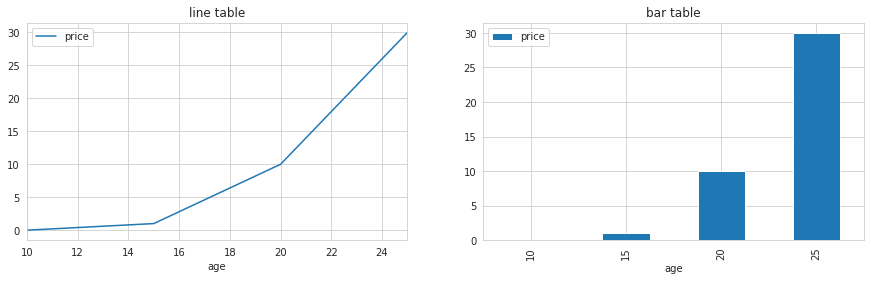

In [3]:
df = pd.DataFrame(data=[[10,0],[15,1],[20,10],[25,30]],columns=["age","price"])
# 使用子图, 实现在同一行下多个坐标轴. subplots 前两个参数指定 x/y, 即行列数
# plt.subplots?
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

# 常规图的画法, 指定 x/y 轴即可. 其他参数参考文档添加
# df.plot?
df.plot(kind='line',x="age",y="price",title='line table',ax=axis1)
df.plot(kind='bar',x="age",y="price",title='bar table',ax=axis2)

## 生成数据的几种方式
一般通过 numpy 生成数组/矩阵, 然后用之生成dataframe.

shape 维度, tuple of ints. 可以是数组.
order 行存储`C`/列存储`F`, 默认为 `C`

### 随机数组
使用np生成随机矩阵参考 `np.random` 库
1. 随机数组使用 `np.random.random(size)` 生成, size  指元素个数, 元素值分布在 `[0.0, 1.0)` 内.
2. 随机矩阵使用 `np.random.rand(d0,d1,....)`.
3. 随机整数使用 `np.random.randint(low,high,size)`
4. 其他正态分布随机 等等参照api.

### dataframe 生成

In [ ]:
# 创建空数组. 创建一个未初始化的数组, 元素值是未初始化的, 地址中原先的值.
print(np.empty([2],dtype=int))
print("----------")

# 创建指定大小的数组, 用 0/1 填充
print(np.zeros([2,1],dtype=int))
print("----------")
print(np.ones([2,3,3],dtype=int,order='C'))
print("----------")

# 按步长生成数组
print(np.arange(1,10,2,dtype=int))

# 创建一维随机数组.
print(np.random.random(3))
# 创建随机矩阵
print(np.random.rand(2,2))
# 创建随机整数
print(np.random.randint(1,100,3))

In [ ]:
# 使用构造函数, 并直接添加data
pd.DataFrame(data=[[10,0],[15,0],[20,1],[25,3]],columns=["age","price"]).head(2)

# 使用json, 按列生成
df = pd.DataFrame({'age':[1,3,4,5]}).head()

# 使用构造函数, 然后逐渐添加列. 注意, 每列长度要相同
df = pd.DataFrame(columns=["age","price"])
df.age=np.arange(1,10,2)
df.price=np.random.randint(10,100,5)
df.head(2)

## 折线图

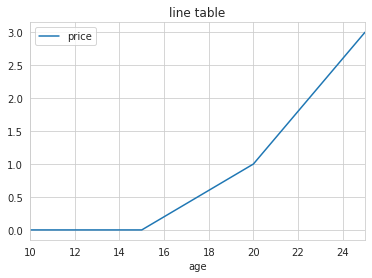

In [128]:
# line , 折线图, 默认值.
df = pd.DataFrame(data=[[10,0],[15,0],[20,1],[25,3]],columns=["age","price"])
df.plot(kind='line',x="age",y="price",title='line table')

## 条形图
分为 条形图 和 水平条形图

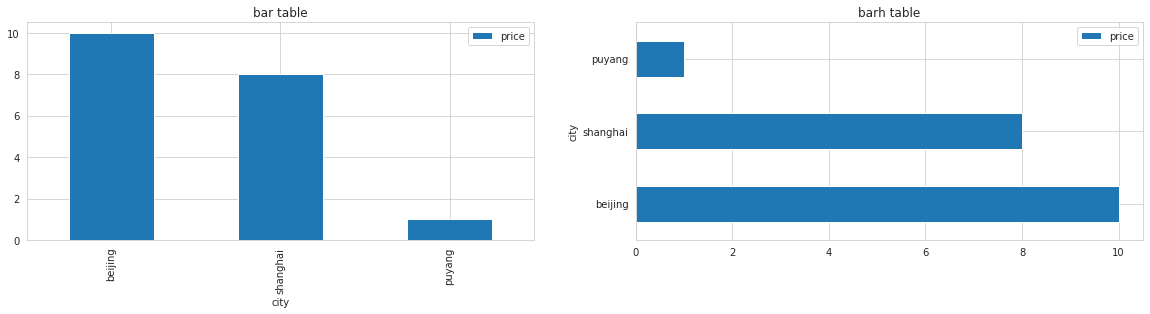

In [191]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,4))

# bar 条形图, 柱状图, 多用于查看离散值的分布
df = pd.DataFrame(data=[['beijing',10],['shanghai',8],['puyang',1]],columns=["city","price"])
df.plot(kind='bar',x="city",y="price",title='bar table',ax=axis1)
# barh, 水平条形图, x y 轴和值都颠倒
df.plot(kind='barh',x="city",y="price",title='barh table',ax=axis2)

## 直方图
直方图 多用于查看 连续间隔/特定时间段内数据分布情况. 

直方图不需要指定 y 值, 只需要给定一组数据, x 轴为数组中每个元素, y 轴为该元素出现的次数. 多组数据可以叠加, 统计方式同单列.

如果data是数组, x 为数组中的元素, `y=count(x)`
如果data是df, 使用 `df.plot(kind='hist')` 绘图时, 会将 y轴指定的列作为数据源, 即 x 为该列的元素, `y=count()`

具体参数可以参考如下 `plt.hist?`. 常用参数
1. alpha: 透明度. 绘制多个数据集时设置透明度, 使多列的值重合但不覆盖.

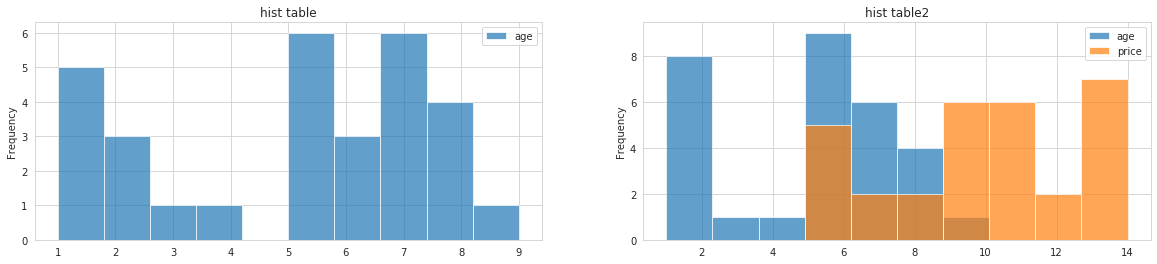

(array([1., 3., 2., 0., 0., 3., 1., 6., 0., 4.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

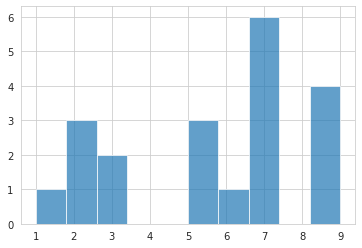

In [89]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,4))

# 用法一: 使用dataframe作为数据源时, y轴指定的列 作为数据源
df = pd.DataFrame(columns=['age','price'])
df.age = np.random.randint(1,10,30)
df.price = np.random.randint(5,15,30)
df.plot(kind='hist', y='age', title="hist table", alpha=0.7, ax=axis1)
# 当不选定列时, 会自动统计所有的列, 按颜色区分.
df.plot(kind='hist', title="hist table2", alpha=0.7, ax=axis2)
plt.show()

# 用法二: 使用数组, 自动聚合值
arr = np.random.randint(1,10,20)
plt.hist(arr, alpha=0.7)

## 箱图box
数据源拥有多组数据, 每组数据有多个值, 箱图用于表示多组数据间 最大值/最小值/中位数 等指标 的对比.

如股票中的 k 线图.

pandas 箱图会统计每列的数据, 然后将其绘制为图. 使用方法如下, 以k线图举例
1. 日期作为列, 如 20191211, 20191212, 20191213 三列, 然后填充值即可
2. 调用 `df.boxplot` 或 `df.plot(kind='box')`

看懂箱线图
1. 线的上下端表示该组数据的最大值和最小值
2. 箱的上下段表示该组数据中前25%和前75%位置的值
3. 箱中横线表示中位数.

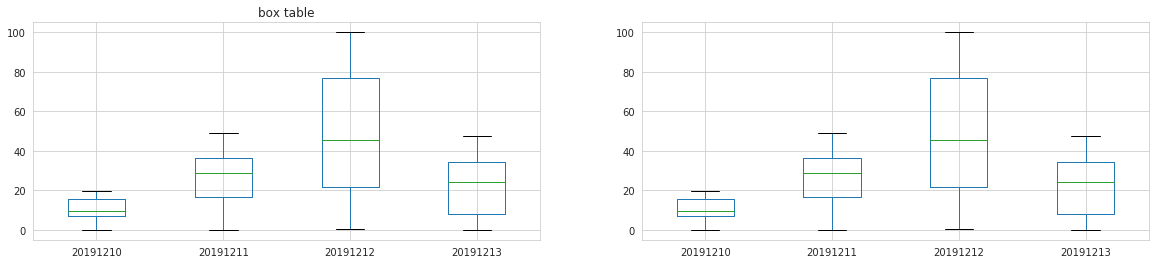

In [192]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,4))

df = pd.DataFrame(columns=['20191210','20191211','20191212','20191213'])
df['20191210'] = np.random.random(50)*20
df['20191211'] = np.random.random(50)*50
df['20191212'] = np.random.random(50)*100
df['20191213'] = np.random.random(50)*50
df.plot(kind='box', title="box table", ax=axis1)
df.boxplot(ax=axis2)

## 密度图kde
密度图即各数据点连成的平滑曲线.

参考直方图, 密度图即在直方图的基础上, 将各个直方链接成线(跟学微积分时挺像的, 只不过微积分是将线无限拆分为小直方).
与直方图相同, 密度图也是取各列作为一组数据, 绘图连线.

`kind=density` 时也是密度图.

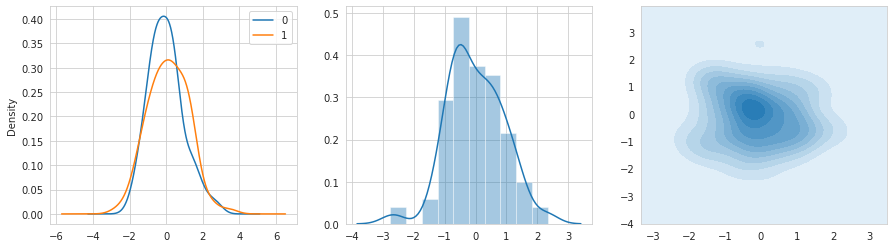

In [100]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,4))
# sns.kdeplot?
df = pd.DataFrame(np.random.randn(100,2))
df.plot(kind='kde', ax=axis1)

# 同时绘制直方图和密度图
sns.distplot(x,ax=axis2)

# 二元密度图
x=np.random.randn(100)
y=np.random.randn(100)
sns.kdeplot(x,y,shade=True, ax=axis3)

# 面积图area
面积图 看起来像 线与x/y轴围的区域用颜色填充 的密度图.

但是面积图的绘图方式不同.

密度图/直方图 都是给定一组数据, 然后绘图时计算值出现的次数作为 y 值.
而密度图 将index作为 x 轴(或者自行指定某一列), 然后将数据的值直接作为y轴, 并不计算出现次数.

因为是面积, 自然不能为负数.

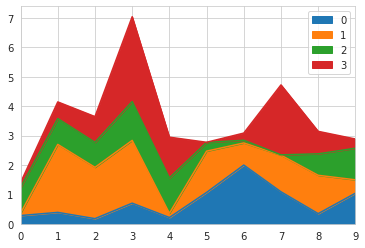

In [126]:
df = pd.DataFrame(np.abs(np.random.randn(10,4)))
df.plot(kind='area')

## 饼图pie
将 df 的 index 作为x, 每一列的值作为 y, 按所占百分比绘制饼图(直接按值计算, 而非计数).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f26095c7e50>,
      dtype=object)

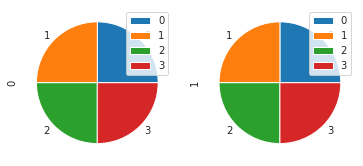

In [180]:
df = pd.DataFrame(np.ones(shape=(4,2)))
df.plot.pie(subplots=True)

## 散点图
散点图, 即给定 x,y , 直接渲染在坐标轴上.

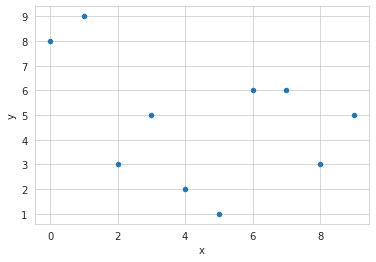

In [170]:
# df.plot.scatter?
df = pd.DataFrame({'x':np.arange(0,10,1),'y':np.random.randint(1,10,10)})
df.plot(kind='scatter',x='x',y='y')
# df.head()

## 位图hexbin
同散点图, 给定 x,y, 直接渲染到坐标轴上. 只不过粒度更小, 适合 位图数据/海量数据 的描绘.

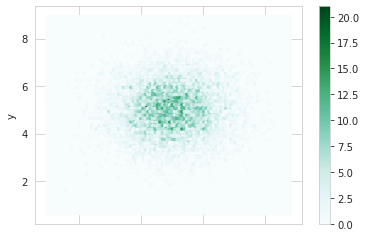

In [190]:
# df.plot.hexbin?
# df = pd.DataFrame({'x':np.arange(0,10,0.01),'y':np.random.randint(1,10,1000)})
df = pd.DataFrame(np.abs(np.random.randn(10000,2)+5), columns=['x','y'])
df.plot(kind='hexbin',x='x',y='y')
# df.head()

## 热力图
多用于显示数据在不同位置上的分布密度.

地理空间可以作为位置, 日期+城市 也可以作为位置.

`sns.heatmap()` 的数据集多为 `[x,y,v]`. 即 位置xy 和 权重v. v 的范围决定颜色的映射范围(根据不同的映射方法), 而后根据位置绘图.

使用方法参考 `sns.heatmap?`, 部分解释如下
1. cmap: matplotlib颜色表名称或对象, 或颜色列表, 可选从数据值到色彩空间的映射
2. center: 指定色彩的中心值. center 指定一个值, 点/区域xy的值v 离该值越远则颜色越浅, 越近则颜色越深.
3. annot: 为 True 时直接将 v 写入单元格, 当为 array-like 时, 将 annot 的值写入单元格
4. fmt: 写入单元格的数据的格式. 默认 `.2g`
5. cbar: 颜色条, 图例内容. 用于标识值和颜色的标尺
6. mask: mask 用于过滤某些值. 符合 mask 条件的值不会被渲染, 常用于加深某些值的显示效果. 具体参考如下.


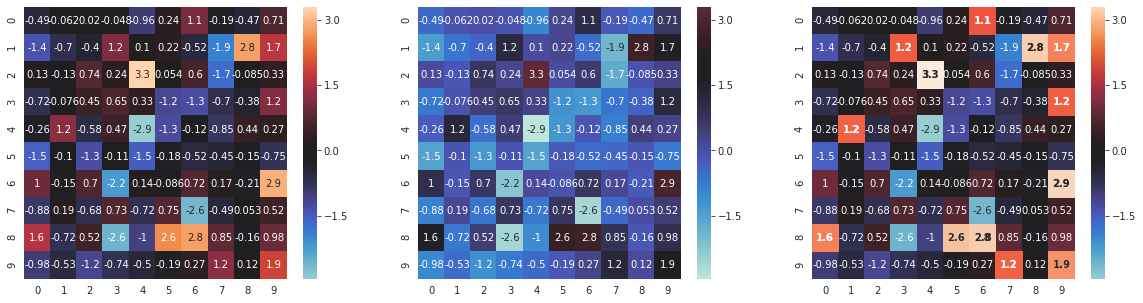

In [194]:
# sns.heatmap?
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))
x = np.random.randn(10, 10)

# 坐标轴1
sns.heatmap(x, annot=True, ax=ax1, center=0)
# 查看 center 效果
sns.heatmap(x, annot=True, ax=ax2, center=2)
# 查看 mask 效果, 加重 v>1 的点的显示效果(符合条件的值已被加粗)
sns.heatmap(x, annot=True, ax=ax3, center=0)
sns.heatmap(x, mask=x < 1, cbar=False, ax=ax3, annot=True, annot_kws={"weight": "bold"})

## 参考
1. [常用的50种图](https://www.jiqizhixin.com/articles/2019-01-15-11)